# Q-Learning

Este notebook demonstra a implementação do algoritmo de Q-Learning, uma técnica de Aprendizado por Reforço. 
O Q-Learning é amplamente utilizado para resolver problemas onde um agente aprende a tomar decisões em um ambiente, 
maximizando uma recompensa cumulativa.

## Estrutura do Notebook
1. **Definição do Ambiente** - Inicializamos e definimos o ambiente no qual o agente irá operar.
2. **Configuração do Q-Learning** - Explicamos os parâmetros e como a tabela Q é inicializada.
3. **Treinamento do Agente** - Iteramos através de múltiplos episódios para treinar o agente.
4. **Avaliação** - Após o treinamento, avaliamos o desempenho do agente.
5. **Visualização dos Resultados** - Incluímos gráficos ou representações dos resultados.

---

Step 1: Install dependencies

In [1]:
!pip install gym --upgrade
!pip install pygame
!pip install numpy

!pip install huggingface_hub
!pip install pyyaml==6.0 # avoid key error metadata
!pip install imageio imageio_ffmpeg

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Step 2: Import the packages

In [2]:
import numpy as np
import gym #OpenAI - biblioteca que fornece um conjunto padronizado de ambientes de simulação para testar e desenvolver algoritmos de Aprendizagem por Reforço (RL).
import random
import imageio
import os


Frozen Lake

In [3]:
# Create the FrozenLake-v1 environment using 4x4 map and non-slippery version
env = gym.make("FrozenLake-v1",map_name="4x4",is_slippery=False)

In [4]:
# We create our environment with gym.make("<name_of_the_environment>")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 2


In [5]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 3


Create and Initialize the Q-table

In [6]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  16  possible states
There are  4  possible actions


In [7]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space,action_space))
  return Qtable

In [8]:
Qtable_frozenlake = initialize_q_table(state_space, action_space)
Qtable_frozenlake

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Define the epsilon-greedy policy

In [9]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  # Randomly generate a number between 0 and 1
  random_int = random.uniform(0,1)
  # if random_int > greater than epsilon --> exploitation
  if random_int > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = np.argmax(Qtable[state])
  # else --> exploration
  else:
    action = env.action_space.sample()

  return action

hyperparameters

In [10]:
# Training parameters
n_training_episodes = 10000  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
#n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
env_id = "FrozenLake-v1"     # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate
eval_seed = []               # The evaluation seed of the environment

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob

Training

In [11]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in range(n_training_episodes):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state, info = env.reset()
    step = 0
    done = False

    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = epsilon_greedy_policy(Qtable, state, epsilon)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, done, truncated, info = env.step(action)

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If done, finish the episode
      if done or truncated:
        break

      # Our state is the new state
      state = new_state
  return Qtable

In [12]:
Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)
Qtable_frozenlake

C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [13]:
# Avaliação do Agente com Registro dos Passos
state = env.reset()
if isinstance(state, tuple):
    state = state[0]  # Caso o estado seja retornado como uma tupla
done = False
total_reward = 0
steps = []  # Lista para registrar os passos

print("Iniciando a avaliação do agente...")

# Episódio único para avaliação
while not done:
    steps.append(state)  # Armazena o estado atual
    action = np.argmax(Qtable_frozenlake[state, :])  # Escolhe a melhor ação
    step_return = env.step(action)

    if len(step_return) == 5:
        next_state, reward, done, truncated, info = step_return
        done = done or truncated
    elif len(step_return) == 4:
        next_state, reward, done, info = step_return
    else:
        next_state, reward, done = step_return
        info = {}

    if isinstance(next_state, tuple):
        next_state = next_state[0]

    total_reward += reward
    state = next_state

steps.append(state)  # Adiciona o último estado
print(f"Avaliação concluída. Recompensa total: {total_reward}")
print(f"Passos tomados pelo agente: {steps}")


Iniciando a avaliação do agente...
Avaliação concluída. Recompensa total: 1.0
Passos tomados pelo agente: [0, 4, 8, 9, 13, 14, 15]


**Valores de Q:**

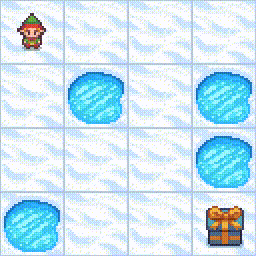

Esquerda (0):

Baixo (1):

Direita (2):

Cima (3):

Reference:https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial